# データ概要確認
 SIGNATEの【練習問題】銀行の顧客ターゲティングのデータ( https://signate.jp/competitions/1/data )を使用して, train.csvの概要を確認する.

## Import

In [1]:
import numpy as np
import pandas as pd

# 可視化ライブラリ
import seaborn as sns
import matplotlib.pyplot as plt

## Setting

In [2]:
# Path
input_path = "./input_data/"

# Set Display Max Columns
pd.set_option("display.max_columns", 50)

# Figure Size
plt.rcParams["figure.figsize"] = (10, 6)

## Read Data
 csvファイルを読込む.

In [3]:
train = pd.read_csv(
    input_path + "bank/train.csv", # データ
    sep=",",                       # 区切り文字の指定
    header=0,                      # ヘッダーは何行目か
    quotechar="\""                 # 囲み文字の指定
)

## Overview
 データの最初の20行を確認.

In [4]:
train.head(20)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1
5,6,29,blue-collar,single,secondary,no,260,yes,no,unknown,2,jun,707,14,-1,0,unknown,1
6,7,37,services,married,secondary,no,52,yes,no,cellular,6,sep,908,1,185,9,success,1
7,8,32,technician,single,secondary,no,230,yes,no,cellular,18,may,442,1,266,8,failure,1
8,9,31,admin.,single,secondary,no,0,yes,no,cellular,7,may,895,2,295,2,failure,1
9,10,32,self-employed,single,tertiary,no,1815,no,no,telephone,10,aug,235,1,102,2,failure,1


 各変数の型確認.

In [5]:
train.dtypes

id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

 変数の各種統計量確認.

In [6]:
del(train["day"])
del(train["month"])
del(train["duration"])

In [7]:
train

,id,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,1,9,2,success,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,27124,42,blue-collar,married,primary,no,1455,yes,no,cellular,2,269,2,other,0
27124,27125,34,services,single,secondary,no,719,yes,no,unknown,3,-1,0,unknown,0
27125,27126,36,blue-collar,single,primary,no,49,yes,no,unknown,1,-1,0,unknown,0
27126,27127,33,housemaid,married,primary,no,209,no,no,cellular,4,-1,0,unknown,0


# 課題部分

### 1. 住宅ローンと個人ローンの契約有無のパターンごとに年間平均残高の平均と定額預金申込率を知りたい

In [8]:
# 住宅ローン：housing
# 個人ローン：loan
# 年間平均残高：balance
# 定額預金申し込み有無：y

# 住宅ローン有無で分けるパターン
train.groupby("housing")[["balance", "y"]].mean()

,balance,y
housing,,
no,1590.778055,0.167625
yes,1169.326083,0.076826


In [9]:
# 個人ローン契約有無で分けるパターン
train.groupby("loan")[["balance", "y"]].mean()

,balance,y
loan,,
no,1466.988152,0.126207
yes,771.990783,0.068664


### 2. 教育水準と年間平均残高の関係がどうやら職種ごとに違うように思う, 調べて欲しい

<Axes: xlabel='education', ylabel='job'>

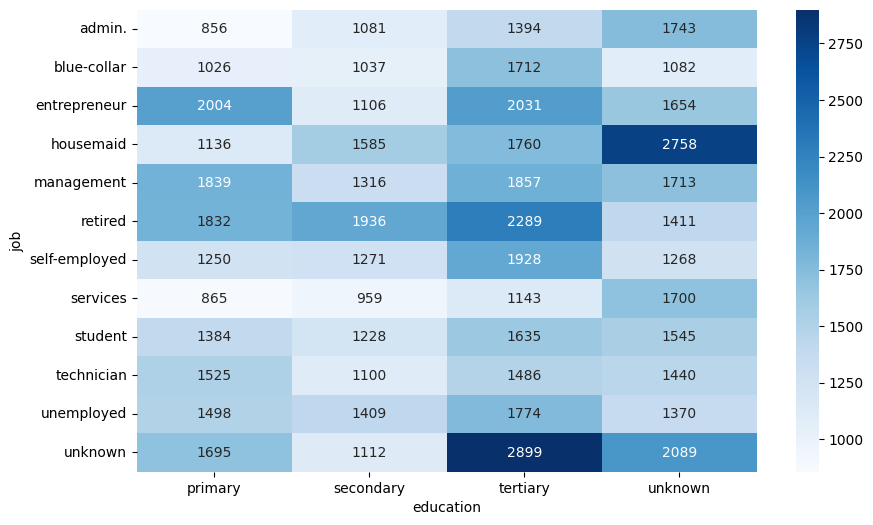

In [10]:
pivot_table = train.pivot_table(
    index='job', 
    columns='education', 
    values='balance', 
    aggfunc='mean'
)
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.0f',
    cmap="Blues"
)

### 3. コスト削減を目的として, 年齢でマーケティング対象を絞った場合に,
### Precision：マーケティング対象の契約率と 
### Recall：契約者の捕捉率はどのようになるか？


In [11]:
# 最高齢の確認
train["age"].max()

np.int64(95)

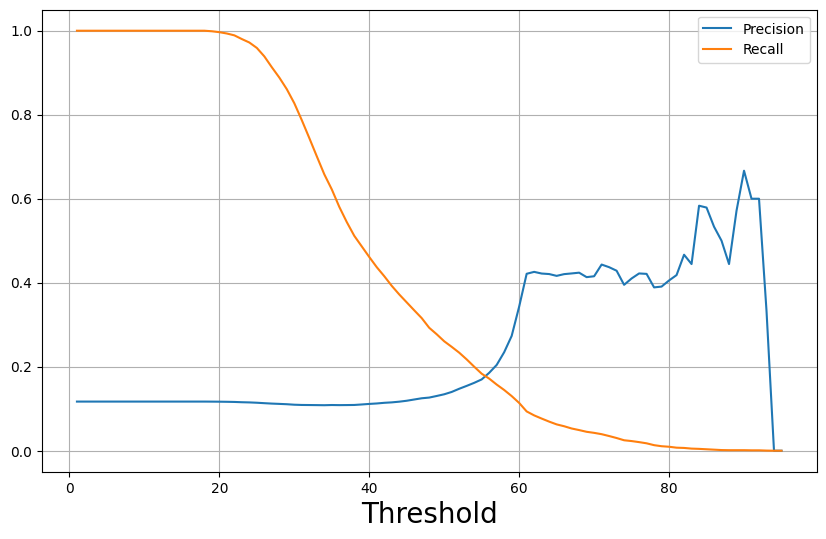

In [12]:
# i歳以上を陽性とする場合
pre = []
rec = []
th = []
N_rate = []
N_all = train.shape[0]
P = train["y"].sum()

for i in range(1, 96):
    threshold = i
    tmp = train[train["age"] >= threshold].copy()
    tp = tmp[tmp["y"] == 1].shape[0]
    fp = tmp[tmp["y"] == 0].shape[0]
    fn = P - tp
    # 分母が0になる場合は0で埋める
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    pre.append(precision)
    rec.append(recall)
    th.append(threshold)
    N_rate.append(tmp.shape[0] / N_all)

table = pd.DataFrame()
table["Precision"] = pre
table["Recall"] = rec
table["N_rate"] = N_rate
table.index = th

table[["Precision", "Recall"]].plot()
plt.xlabel("Threshold", fontsize=20)
plt.grid()
plt.show()

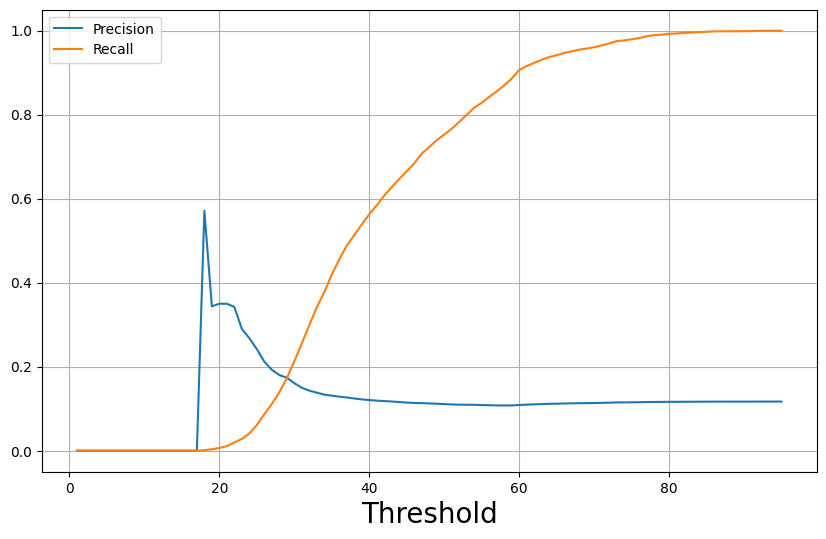

In [13]:
# i歳以下を陽性とする場合
pre = []
rec = []
th = []
N_rate = []
N_all = train.shape[0]
P = train["y"].sum()

for i in range(1, 96):
    threshold = i
    tmp = train[train["age"] <= threshold].copy()
    tp = tmp[tmp["y"] == 1].shape[0]
    fp = tmp[tmp["y"] == 0].shape[0]
    fn = P - tp
    # 分母が0になる場合は0で埋める
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    pre.append(precision)
    rec.append(recall)
    th.append(threshold)
    N_rate.append(tmp.shape[0] / N_all)

table = pd.DataFrame()
table["Precision"] = pre
table["Recall"] = rec
table["N_rate"] = N_rate
table.index = th

table[["Precision", "Recall"]].plot()
plt.xlabel("Threshold", fontsize=20)
plt.grid()
plt.show()

### 4. 定額預金の申し込み率の低い傾向のある集団はどのような層か？うちの会社の定額預金の弱みを分析してほしい

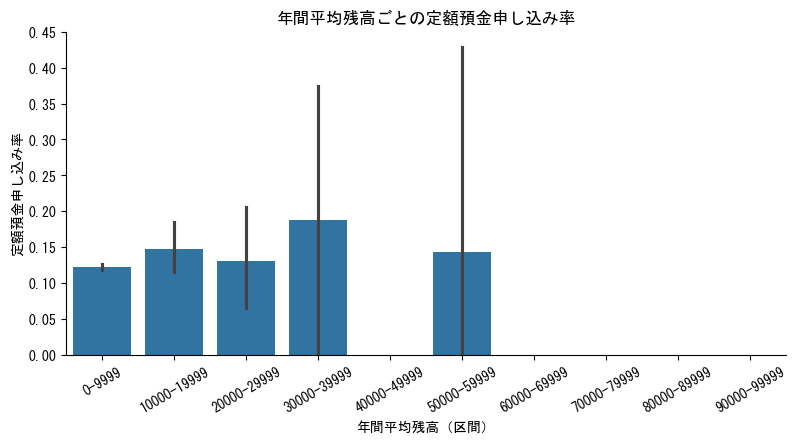

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

# 0から100,000まで10,000ごとに区切る
bins = np.arange(0, 110000, 10000)  # 0, 10000, 20000, ..., 100000
labels = [f"{i}-{i+9999}" for i in bins[:-1]]

train["balance_bin"] = pd.cut(train["balance"], bins=bins, labels=labels, right=False)

# グラフ描画
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    data=train,
    x="balance_bin",
    y="y",
    kind="bar",
    height=4,
    aspect=2
)
plt.xlabel("年間平均残高（区間）")
plt.ylabel("定額預金申し込み率")
plt.title("年間平均残高ごとの定額預金申し込み率")
plt.xticks(rotation=30)
plt.show()

## 狙い目？：[20000-29999], [50000-59999]
でもそこまで低いわけでもない

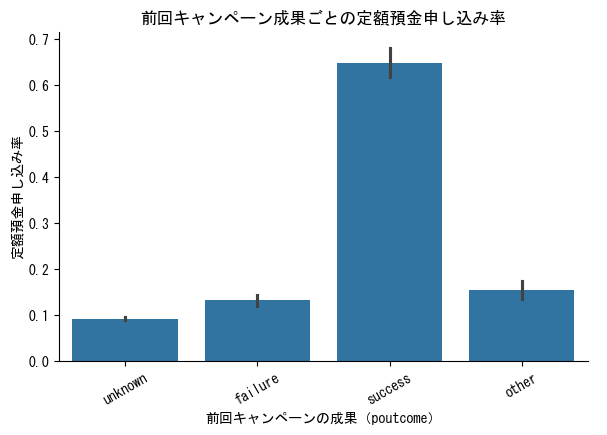

In [15]:
sns.catplot(
    data=train,
    x="poutcome",
    y="y",
    kind="bar",
    height=4,
    aspect=1.5
)
plt.xlabel("前回キャンペーンの成果（poutcome）")
plt.ylabel("定額預金申し込み率")
plt.title("前回キャンペーン成果ごとの定額預金申し込み率")
plt.xticks(rotation=30)
plt.show()

## 前回キャンペーン成果「success」が頭抜けて高
前回キャンペーン成果が『unknown』や『failure』だった顧客には異なるアプローチや提案が必要

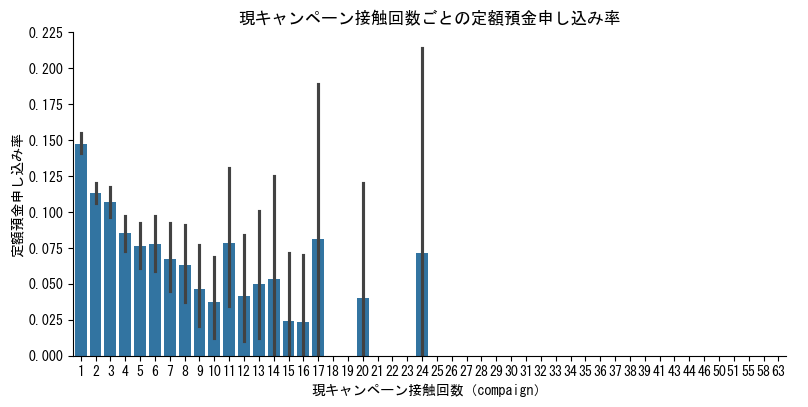

In [16]:
sns.catplot(
    data=train,
    x="campaign",
    y="y",
    kind="bar",
    height=4,
    aspect=2
)
plt.xlabel("現キャンペーン接触回数（compaign）")
plt.ylabel("定額預金申し込み率")
plt.title("現キャンペーン接触回数ごとの定額預金申し込み率")
plt.xticks(rotation=0)
plt.show()

## 接触回数は多すぎると逆効果？

C:\Users\71080448\AppData\Local\Temp\ipykernel_8788\1460323784.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = train.pivot_table(index="age_bin", columns="education", values="y", aggfunc="mean")


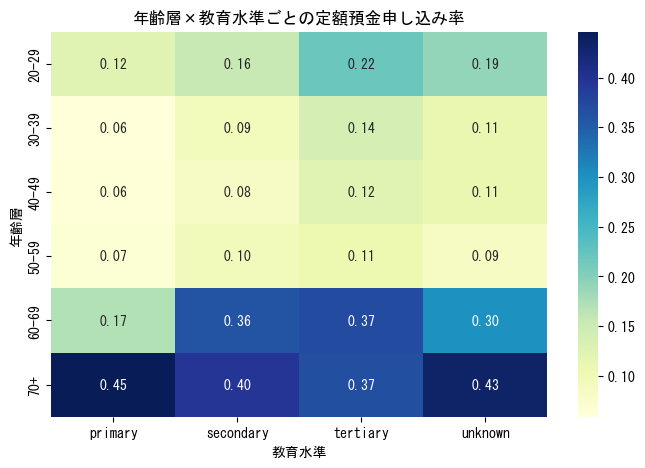

In [17]:
# 年齢を10歳ごとに区間分け
bins = [20, 30, 40, 50, 60, 70, 100]
labels = ["20-29", "30-39", "40-49", "50-59", "60-69", "70+"]
train["age_bin"] = pd.cut(train["age"], bins=bins, labels=labels, right=False)

# クロス集計
pivot = train.pivot_table(index="age_bin", columns="education", values="y", aggfunc="mean")

# ヒートマップで可視化
plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.xlabel("教育水準")
plt.ylabel("年齢層")
plt.title("年齢層×教育水準ごとの定額預金申し込み率")
plt.show()

## 申し込み率0.1以下の「30~59」歳かつ教育水準「secondary」以下の層は狙い目？